### 17) 트리모형의 교차검증 1

In [1]:
from sklearn.datasets import load_iris

data = load_iris()

#플로팅을 하기 위하여 변수 2개만 사용(꽃잎의 길이와 폭)
X = data.data[:, 2:]
y = data.target

feature_names = data.feature_names[2:]

In [9]:
print(X)
print(y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [7]:
feature_names

['petal length (cm)', 'petal width (cm)']

In [2]:
from sklearn import tree
from IPython.display import Image, display
import pydotplus

def draw_decision_tree(model):
    dot_data = tree.export_graphviz(model, out_file=None,
        feature_names=feature_names,filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    return Image(graph.create_png())

In [3]:
import matplotlib as mpl
import numpy as np 
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    #정방행렬로 만들고
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    #[xx1.ravel(), xx2.ravel()]).T - 1차원으로 만들고 행렬 전치
    Z = model.predict( np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    # 등고선, 2차원 넘파이 배열
    plt.contour(xx1, xx2, Z, colors='k')
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

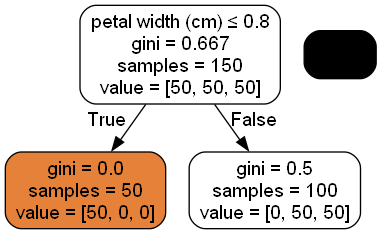

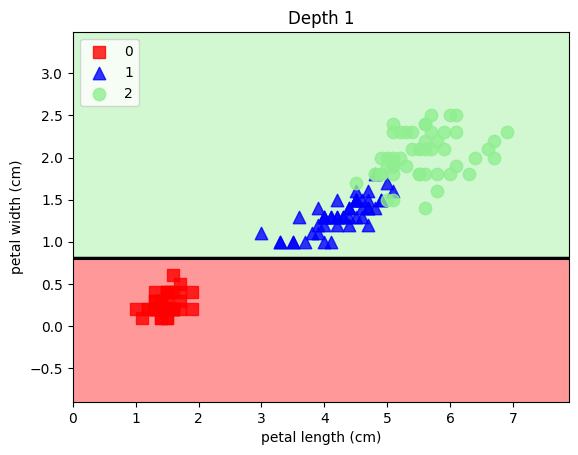

[[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]


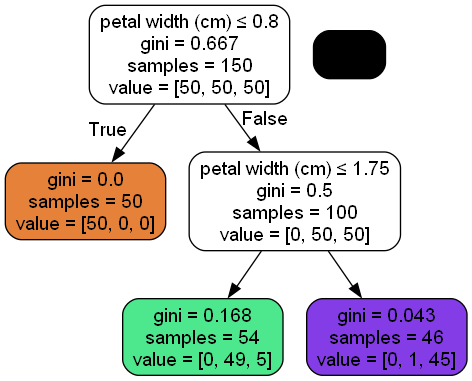

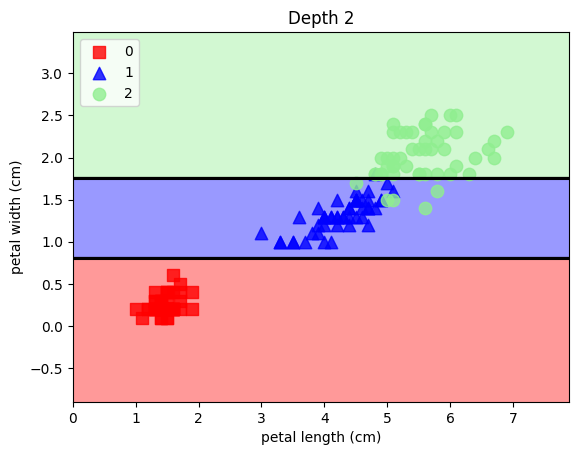

[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]


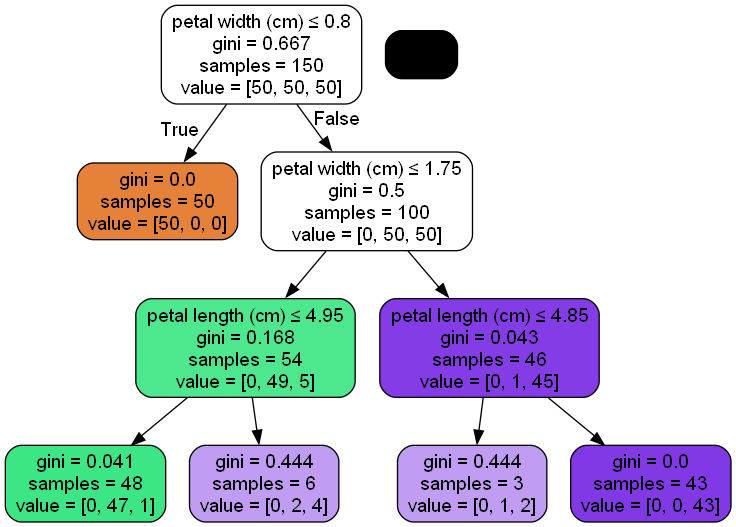

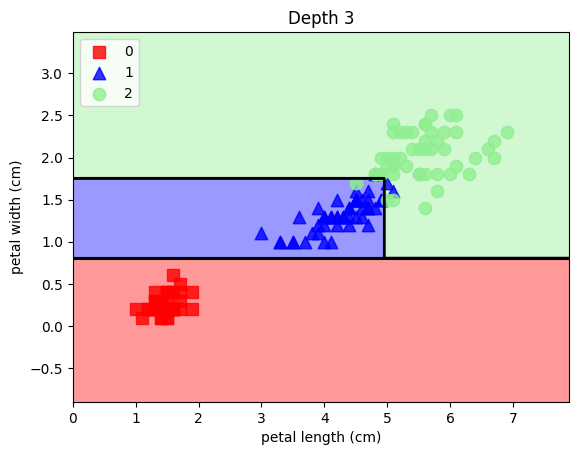

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


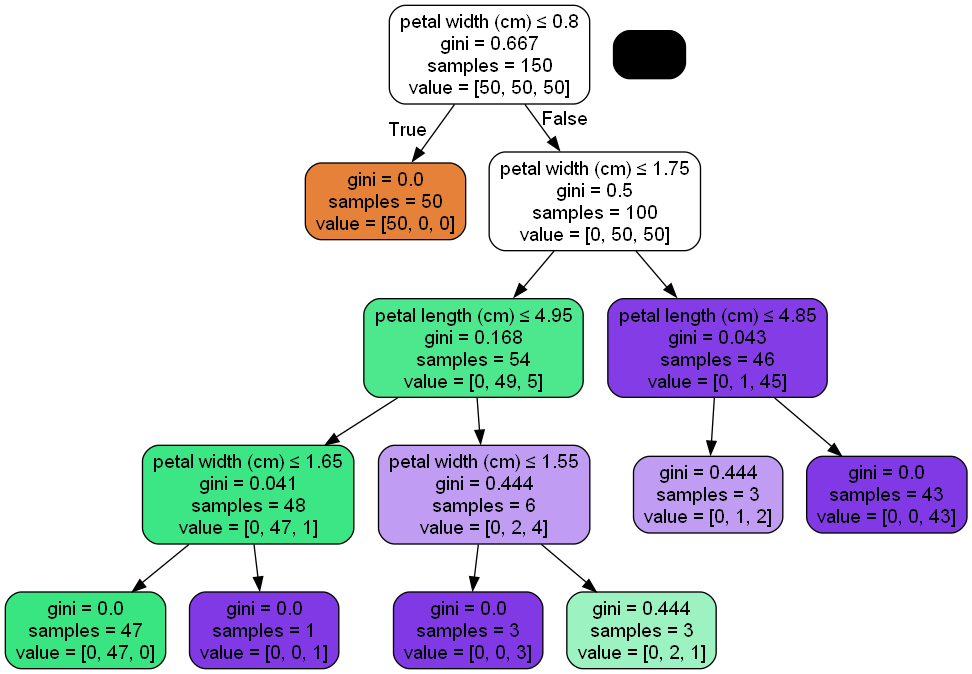

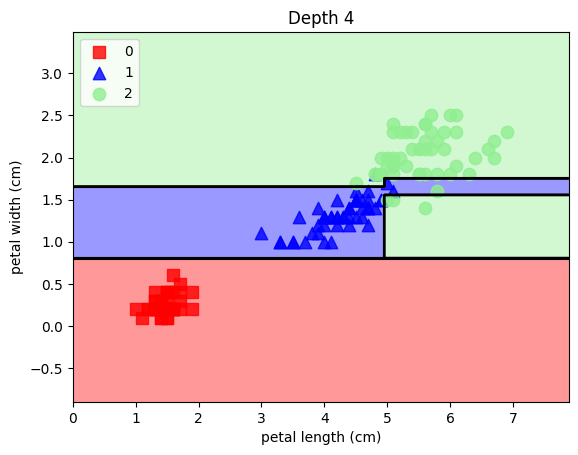

[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]


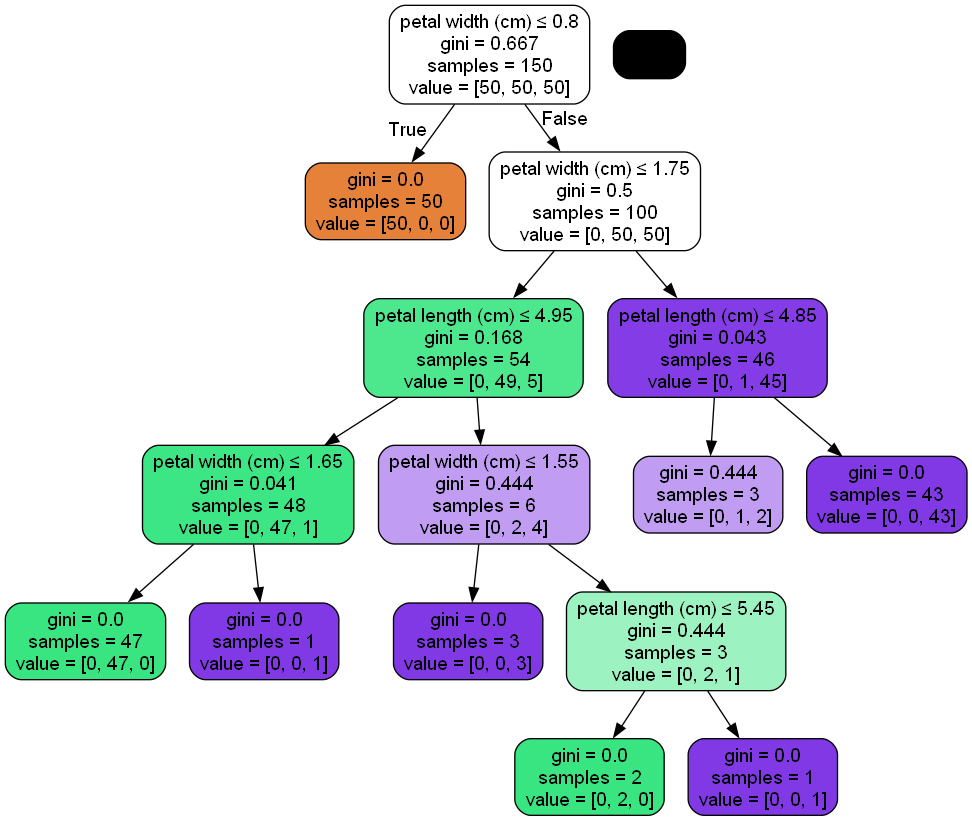

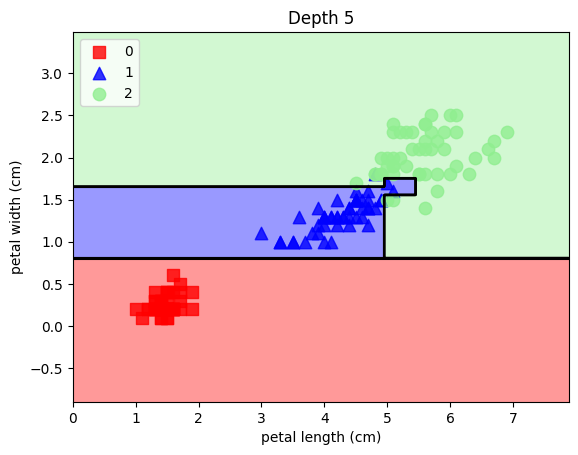

[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

for i in range(1,6):
    plt.figure()
    model = DecisionTreeClassifier(max_depth=i, random_state=0).fit(X, y)
#                                   최대 단계
    display(draw_decision_tree(model))
    plot_decision_regions(X, y, model, f"Depth {i}")
    plt.show()
    print(confusion_matrix(y, model.predict(X)))

#출력결과가 스크롤이 될 경우 output의 왼쪽셀을 클릭하면 전체보기를 할 수 있음

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y, model.predict(X)))
#                         실제값        예측값

#      precision    recall  f1-score
#     모델의 정확도   재현률  조화평균

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [6]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(5, shuffle=True, random_state=0)
#        세트수    섞음         랜덤기준
#       30      30      30      30      30
#   1   train   train   train   train   test
#   2   train   train   train   test    train
#   3   train   train   test    train   train
#   4   train   test    train   train   train
#   5   test    train   train   train   train

i=1

train_scores=[]
test_scores=[]

for train_index, test_index in cv.split(X,y):
    print(i,'fold')

    X_train, X_test = X[train_index,], X[test_index,]
    y_train, y_test = y[train_index], y[test_index]

    model = DecisionTreeClassifier(random_state=0)
    model.fit(X_train, y_train)

    score = model.score(X_train, y_train)
    print(score)

    train_scores.append(score)
    score = model.score(X_test, y_test)
    print(score)

    test_scores.append(score)
    i+=1

print('평균')
print(np.mean(train_scores))
print(np.mean(test_scores))

print('최대')
print(np.max(train_scores))  
print(np.max(test_scores))

1 fold
0.9916666666666667
0.9666666666666667
2 fold
0.9916666666666667
0.9
3 fold
0.9916666666666667
1.0
4 fold
0.9916666666666667
0.9333333333333333
5 fold
1.0
0.9333333333333333
평균
0.9933333333333334
0.9466666666666667
최대
1.0
1.0


In [13]:
cv.split(X,y)
# generator : 데이터를 그때 그때 필요할때마다 만듦

<generator object _BaseKFold.split at 0x000001C7BD631D60>

In [14]:
list(cv.split(X,y))

[(array([  0,   1,   2,   3,   4,   5,   6,   9,  10,  11,  12,  13,  14,
          15,  17,  18,  19,  20,  21,  23,  25,  27,  28,  29,  30,  31,
          32,  34,  35,  36,  38,  39,  41,  42,  43,  46,  47,  48,  49,
          50,  52,  53,  55,  56,  57,  58,  59,  60,  61,  64,  65,  67,
          68,  69,  70,  72,  74,  75,  77,  79,  80,  81,  82,  83,  84,
          85,  87,  88,  89,  91,  92,  94,  95,  96,  98,  99, 101, 102,
         103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 115, 116, 117,
         118, 119, 120, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132,
         133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
         147, 148, 149]),
  array([  7,   8,  16,  22,  24,  26,  33,  37,  40,  44,  45,  51,  54,
          62,  63,  66,  71,  73,  76,  78,  86,  90,  93,  97, 100, 107,
         114, 121, 126, 134])),
 (array([  0,   1,   3,   4,   5,   6,   7,   8,   9,  11,  12,  13,  14,
          15,  16,  17,  19,  20,  21,  22,  23,  24, 

In [10]:
model = DecisionTreeClassifier(random_state=0)

cross_val_score(model, X, y, scoring="accuracy", cv=cv).mean()

0.9466666666666667

In [15]:
cross_val_score(model, X, y, scoring='accuracy', cv=cv)

array([0.96666667, 0.9       , 1.        , 0.93333333, 0.93333333])

In [16]:
cross_val_score(model, X, y, scoring='accuracy', cv=cv).mean()

0.9466666666666667

In [11]:
cross_val_score(model, X, y, scoring='accuracy', cv=cv).max()

1.0